In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score

In [47]:
def least_confident_sampling(proba):
    """Input must be of shape (n_samples, n_classes=2)"""
    cls = proba.max(axis=1)
    least_confident = cls.argmin()
    return least_confident


def margin_sampling(proba):
    print(proba.shape)
    rng = np.arange(proba.shape[0])
    cls_ind = proba.argmax(axis=0)
    msk = np.zeros(proba.shape).astype(np.bool)
    msk[rng,cls_ind] = True
    
    scd_ind = proba[msk].argmax(axis=0)
    
    return cls.argmin()

In [52]:
# make_3 blobs
n_samples = 400
centers = np.array([[2,1], [-3,-1], [-1,3]])
stds = np.array([[1,1],[1,1], [1,1]])

blobs = datasets.make_blobs(n_samples, centers=centers, cluster_std=stds)
pool = blobs[0]
target = blobs[1]
samples0 = pool[target == 0,:]
samples1 = pool[target == 1,:]
samples2 = pool[target == 2,:]

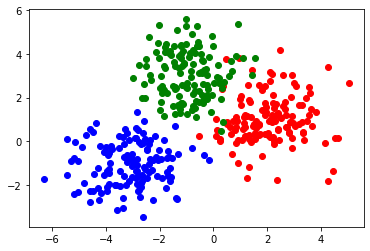

In [53]:
#print moons
plt.figure()
plt.scatter(samples0[:,0], samples0[:,1], c='r')
plt.scatter(samples1[:,0], samples1[:,1], c='b')
plt.scatter(samples2[:,0], samples2[:,1], c='g')
plt.show()

In [54]:
#Reference svm trained on the whole dataset
clf_ref = svm.SVC(C=1, kernel='rbf', probability=False)
clf_ref.fit(pool, target)
acc_ref = accuracy_score(target, clf_ref.predict(pool), normalize=True)
print(acc_ref)

0.975


160 [-1.41681764  0.69134738] 1
(391, 2) (391,)
205 [-0.36149478  1.95715453] 2
(390, 2) (390,)
346 [0.24680302 0.09213247] 0
(389, 2) (389,)
116 [-0.54789323  0.23983456] 0
(388, 2) (388,)
83 [-0.986364    1.23744849] 2
(387, 2) (387,)
280 [-1.67946514 -0.4490132 ] 1
(386, 2) (386,)
37 [-0.08108908  1.35300926] 2
(385, 2) (385,)
85 [-0.78711073 -0.32990438] 1
(384, 2) (384,)
196 [0.08838164 1.0012935 ] 0
(383, 2) (383,)
184 [-0.63499671  1.11575348] 2
(382, 2) (382,)
107 [-0.34158487 -0.6259814 ] 1
(381, 2) (381,)
RESULT:


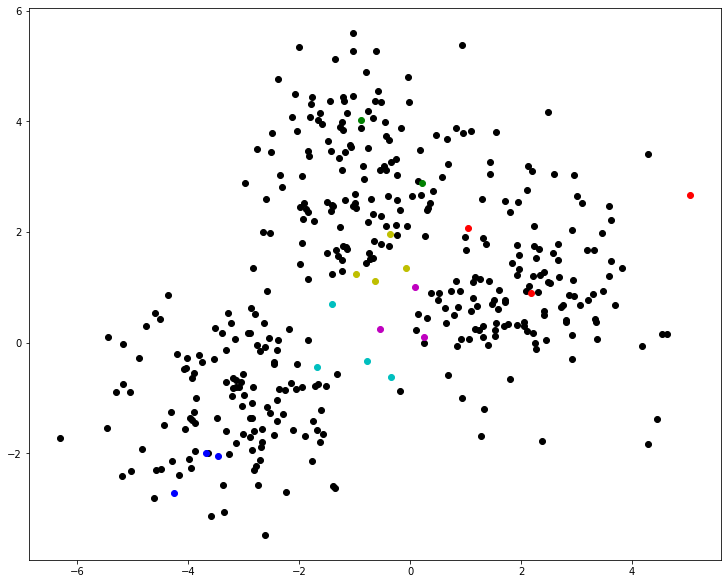

In [55]:
#Randomly select a few samples
n_samples_init = 8
samples_init_idx = np.random.choice(np.arange(n_samples), size=n_samples_init)
train_set = pool[samples_init_idx,:]
train_lab = target[samples_init_idx]
lab_0_idx = train_lab == 0
lab_1_idx = train_lab == 1
lab_2_idx = train_lab == 2
initial_label_0 = lab_0_idx
initial_label_1 = lab_1_idx
initial_label_2 = lab_2_idx
initial_samples = train_set
mask = np.ones((n_samples,)).astype(np.bool)

for i in samples_init_idx:
    mask[i] = False

pool = pool[mask,:] #removing the now labeled samples
target= target[mask] #Idem

clf = svm.SVC(C=1, kernel='linear', probability=True)
clf.fit(train_set, train_lab)
acc = accuracy_score(target, clf.predict(pool), normalize=True)
sampling_strat = least_confident_sampling


while acc_ref-.0001 >= acc:
    # Selecting a new sample
    new_sample_idx = sampling_strat(clf.predict_proba(pool))
    new_sample = pool[new_sample_idx,:]
    new_label = target[new_sample_idx]
    print(new_sample_idx, new_sample, new_label)
    # Adding new sample to training set
    #print(train_set)
    #print(new_sample)
    #print(np.append(train_set, np.array([new_sample]), axis=0))
    tmp_set = np.append(train_set, np.array([new_sample]), axis=0)
    tmp_lab = np.append(train_lab, new_label)
    del(train_set); del(train_lab)
    train_set = tmp_set
    train_lab = tmp_lab
    del(tmp_set); del(tmp_lab)
    lab_0_idx = train_lab == 0
    lab_1_idx = train_lab == 1
    lab_2_idx = train_lab == 2
    #print(train_set.shape, train_lab.shape)
    # Removing new sample from the pool
    mask = np.ones(pool.shape[0]).astype(np.bool)
    mask[new_sample_idx] = False
    pool = pool[mask,:]
    target = target[mask]
    print(pool.shape, target.shape)
    clf.fit(train_set, train_lab)
    acc = accuracy_score(target, clf.predict(pool), normalize=True)


print("RESULT:")
queries = train_set[n_samples_init:,:]
queries_l = train_lab[n_samples_init:]
queries_l_0 = queries_l == 0
queries_l_1 = queries_l == 1
queries_l_2 = queries_l == 2


fig1, ax1 = plt.subplots(constrained_layout=True, figsize=(10,8))

ax1.scatter(pool[:,0], pool[:,1], c='k')
ax1.scatter(initial_samples[initial_label_0,0], initial_samples[initial_label_0,1], c='r')
ax1.scatter(initial_samples[initial_label_1,0], initial_samples[initial_label_1,1], c='b')
ax1.scatter(initial_samples[initial_label_2,0], initial_samples[initial_label_2,1], c='g')
ax1.scatter(queries[queries_l_0,0], queries[queries_l_0,1], c='m')
ax1.scatter(queries[queries_l_1,0], queries[queries_l_1,1], c='c')
ax1.scatter(queries[queries_l_2,0], queries[queries_l_2,1], c='y')

plt.show()
